In [ ]:
#Librerías 
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import pandas.util.testing as tm
# Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from scipy import stats

# Para dividir el dataset en train  y test
from sklearn.model_selection import train_test_split
from sklearn import model_selection

# Algoritmo del Árbol de Decisión
from sklearn.tree import (DecisionTreeClassifier, plot_tree)

# Validación Cruzada 
from sklearn.model_selection import GridSearchCV

# Para calcular métricas
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                            roc_curve, roc_auc_score, precision_recall_curve, plot_confusion_matrix) 

# Para la Normalización 
from sklearn.preprocessing import StandardScaler

#Colors
BLUE   = '#5DADE2'
RED    = '#ff7043'
ORANGE = '#F5B041'
GREEN  = '#58D68D'
YELLOW = '#F4D03F'

# Utiles
from utiles import basic_metrics
from utiles import plot_cm
from utiles import plot_roc_pr

In [ ]:
filename = 'yup_curated_data.csv'  #trabajé con el archivo que me pasó Gustavo: train_curated_data.csv
datos_curados = pd.read_csv(os.path.join('..', 'dataset', filename))

**División y normalización de los datos**

In [ ]:
# División entre instancias y etiquetas
X, y = datos_curados.iloc[:, :-1], datos_curados.student_rating_cat

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# normalización
escalado = StandardScaler()
escalado.fit(X_train)
X_train = escalado.transform(X_train)
X_test  = escalado.transform(X_test)  

## **Ejercicio 3: Árboles de Decisión**

**Árboles de Decisión con parámetros por defecto.**

In [ ]:
arbol_decision = DecisionTreeClassifier(random_state = 42) # para que coincida con el random_state elegido para SGD

print('Parámetros utilizados: \n', np.array(list(arbol_decision.get_params(deep=False).items())))

Parámetros utilizados: 
 [['ccp_alpha' 0.0]
 ['class_weight' None]
 ['criterion' 'gini']
 ['max_depth' None]
 ['max_features' None]
 ['max_leaf_nodes' None]
 ['min_impurity_decrease' 0.0]
 ['min_impurity_split' None]
 ['min_samples_leaf' 1]
 ['min_samples_split' 2]
 ['min_weight_fraction_leaf' 0.0]
 ['presort' 'deprecated']
 ['random_state' 42]
 ['splitter' 'best']]


**Entrenamiento**

In [ ]:
arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

**Predicción**

In [ ]:
y_train_pred_arbolD = arbol_decision.predict(X_train)
y_test_pred_arbolD  = arbol_decision.predict(X_test)

Accuracy con train

In [ ]:
print ('Accuracy: %d ' % ((np.sum(y_train == y_train_pred_arbolD))/float(y_train.size)*100))

Accuracy: 99 


Accuracy con test

In [ ]:
print ('Accuracy: %d ' % ((np.sum(y_test == y_test_pred_arbolD))/float(y_test.size)*100))

Accuracy: 73 


**Valores máximos de profundidad y cantidad de hojas máxima**

In [ ]:
print('Profundidad máxima del árbol:', arbol_decision.get_depth())
print('Cantidad máxima de hojas:', arbol_decision.get_n_leaves())

Profundidad máxima del árbol: 46
Cantidad máxima de hojas: 2581


**Gráficos**

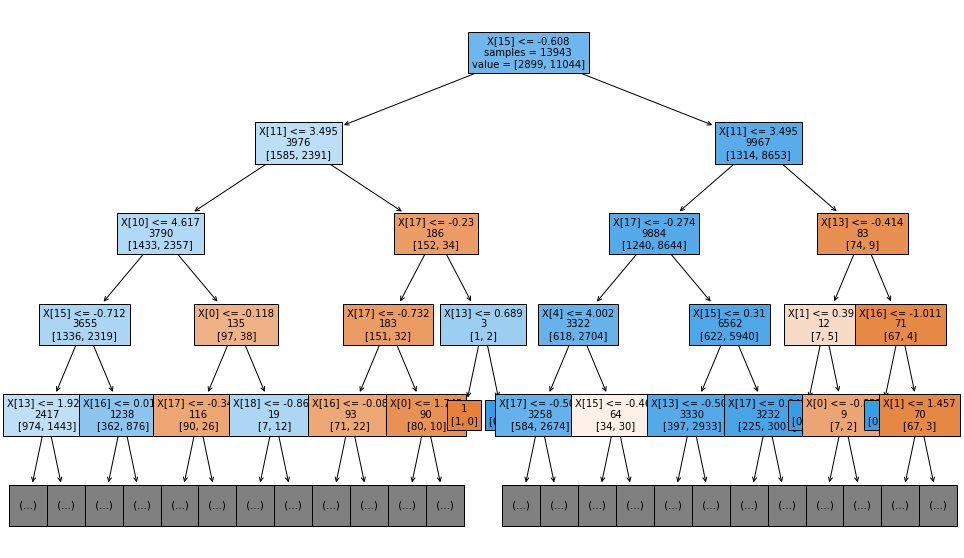

In [ ]:
plt.figure(figsize=(17,10))
plot_tree(arbol_decision, impurity=False, max_depth= 4, fontsize=10, filled=True, label='root')  #filled=True,
plt.show()

**Métricas**


In [ ]:
print('************************************************************')
ad_train = basic_metrics(y_train, y_train_pred_arbolD, 'Train')
print('------------------------------------------------------------')
ad_test = basic_metrics(y_test, y_test_pred_arbolD, 'Test')
print('------------------------------------------------------------')

************************************************************
Métricas Train:
              precision    recall  f1-score   support

           0      0.997     0.999     0.998      2899
           1      1.000     0.999     0.999     11044

    accuracy                          0.999     13943
   macro avg      0.998     0.999     0.999     13943
weighted avg      0.999     0.999     0.999     13943

Confusion Matrix: 
[[ 2895     4]
 [    8 11036]]
------------------------------------------------------------
Métricas Test:
              precision    recall  f1-score   support

           0      0.349     0.368     0.358       699
           1      0.839     0.828     0.834      2787

    accuracy                          0.736      3486
   macro avg      0.594     0.598     0.596      3486
weighted avg      0.741     0.736     0.738      3486

Confusion Matrix: 
[[ 257  442]
 [ 479 2308]]
------------------------------------------------------------


**Gráfico de matriz de confusión**

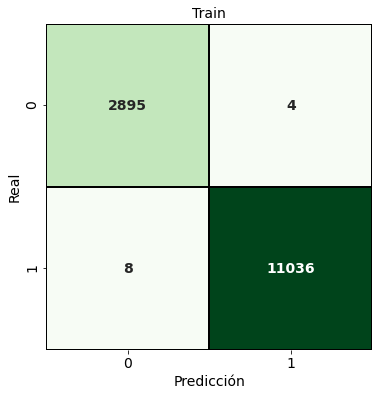

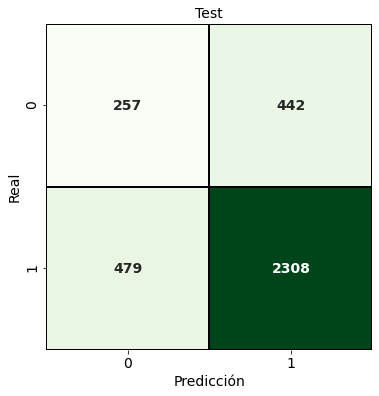

In [ ]:
# Train Matriz de confusión
plot_cm(ad_train, figsize=(10,6), title='Train', cmap='Greens');

# Test Matriz de confusion
plot_cm(ad_test, figsize=(10,6), title='Test', cmap='Greens');

**Curvas ROC y PR**

<module 'matplotlib.pyplot' from '/home/pgianni/venv/vector/lib/python3.7/site-packages/matplotlib/pyplot.py'>

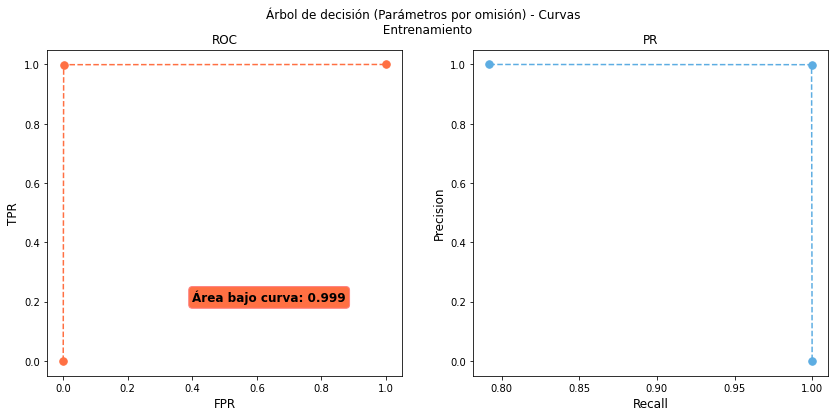

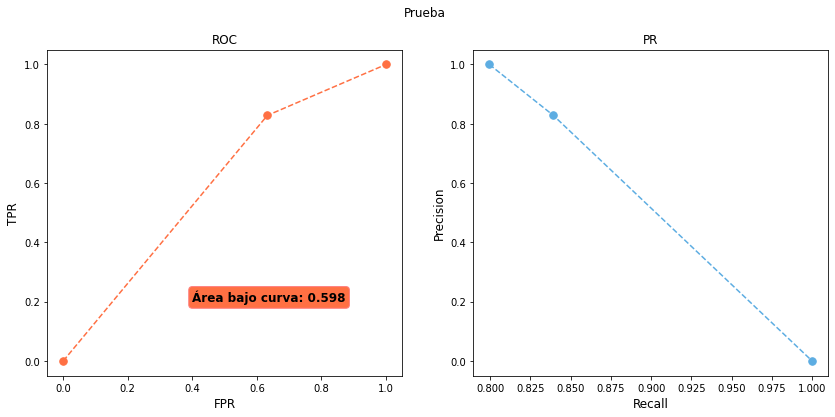

In [ ]:
plot_roc_pr(y_train, y_train_pred_arbolD, Title='Árbol de decisión (Parámetros por omisión) - Curvas \n Entrenamiento')
plot_roc_pr(y_test, y_test_pred_arbolD, Title='Prueba')

## **Ejercicio 3.2: Ajuste de Hiperparámetros**

In [ ]:
arbol_decision_param = DecisionTreeClassifier(random_state= 42)

**Opciones de parámetros**

In [ ]:
param_AD = [
  {'splitter': ['best'],
          'criterion': ['gini', 'entropy'],
          'max_depth': np.arange(2,100,10),
          'min_samples_leaf': np.arange(1,10),
          'min_samples_split': np.arange(2,10),
          'max_features': [None, 'sqrt', 'log2']
          },
  {'splitter': ['random'],
          'criterion': ['gini', 'entropy'],
          'max_depth': list(np.arange(4,100,10))+[None],
          'min_samples_leaf': np.arange(1,10),
          'min_samples_split': np.arange(2,10)
          }
]

**Utilizamos grid-search con 5-fold cross-validation**



In [ ]:
grid_ad = GridSearchCV(arbol_decision_param, param_AD, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit=False, n_jobs=-1, verbose=4)
grid_ad.fit(X_train, y_train);  #

Fitting 5 folds for each of 5904 candidates, totalling 29520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1848 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 2732 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-1)]: Done 3808 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 4601 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 5160 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 5994 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 6924 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 7954 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 9080 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 10306 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 12194 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 13538 tasks   

In [ ]:
# los resultados de la búsqueda lo guardamos como dataframe
arbol_decision_param_df = pd.DataFrame(grid_ad.cv_results_) # 5904 rows × 43 columns


In [ ]:
arbol_decision_param_df  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,...,std_test_recall_weighted,rank_test_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,0.024376,0.003474,0.009725,0.001357,gini,2,None,1,2,best,...,0.000671,145,0.732903,0.732590,0.737462,0.735297,0.735262,0.734703,0.001788,3949
1,0.025858,0.002300,0.008799,0.000768,gini,2,None,1,3,best,...,0.000671,145,0.732903,0.732590,0.737462,0.735297,0.735262,0.734703,0.001788,3949
2,0.025564,0.001331,0.008417,0.000175,gini,2,None,1,4,best,...,0.000671,145,0.732903,0.732590,0.737462,0.735297,0.735262,0.734703,0.001788,3949
3,0.023447,0.001547,0.007709,0.000937,gini,2,None,1,5,best,...,0.000671,145,0.732903,0.732590,0.737462,0.735297,0.735262,0.734703,0.001788,3949
4,0.023401,0.000747,0.010777,0.006110,gini,2,None,1,6,best,...,0.000671,145,0.732903,0.732590,0.737462,0.735297,0.735262,0.734703,0.001788,3949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899,0.035214,0.002212,0.012839,0.001832,entropy,None,NaN,9,5,random,...,0.003117,937,0.770051,0.769127,0.761383,0.759679,0.766960,0.765440,0.004167,345
5900,0.035061,0.003015,0.013134,0.000452,entropy,None,NaN,9,6,random,...,0.003117,937,0.770051,0.769127,0.761383,0.759679,0.766960,0.765440,0.004167,345
5901,0.036235,0.002182,0.012193,0.001222,entropy,None,NaN,9,7,random,...,0.003117,937,0.770051,0.769127,0.761383,0.759679,0.766960,0.765440,0.004167,345
5902,0.033928,0.002197,0.011982,0.000376,entropy,None,NaN,9,8,random,...,0.003117,937,0.770051,0.769127,0.761383,0.759679,0.766960,0.765440,0.004167,345


In [ ]:
# Seleccionamos las columnas que serán útiles para elegir las configuraciones con mejor performance
arbol_decision_param_df = arbol_decision_param_df[['param_criterion', 'param_max_depth',
                              'param_min_samples_leaf', 'param_splitter', 'params', 'mean_test_accuracy', 
                              'std_test_accuracy', 'rank_test_accuracy','mean_test_precision_weighted','std_test_precision_weighted',
                              'rank_test_precision_weighted', 'mean_test_recall_weighted','std_test_recall_weighted',
                               'rank_test_recall_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted']]

In [ ]:
# Seleccionamos los que tienen mejores valores para acurracy, precision, recall y f1.

arbol_decision_según_accuracy = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_accuracy.idxmin()]
arbol_decision_según_precision = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_precision_weighted.idxmin()]
arbol_decision_según_recall = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_recall_weighted.idxmin()]
arbol_decision_según_f1 = arbol_decision_param_df.loc[arbol_decision_param_df.rank_test_f1_weighted.idxmin()]
#
print('-------------------------------------------------------------------------------'
      '\n Puntaje y parámetros correspondiente a los modelos con mejor performance según:'
      '\n ------------------------------------------------------------------------------'
      '\n Accuracy  {:.4f}: {}\n Precision {:.4f}: {}\n Recall    {:.4f}: {}'
      '\n F1-Score  {:.4f}: {}\n'.format(
          arbol_decision_según_accuracy.mean_test_accuracy, arbol_decision_según_accuracy.params,
          arbol_decision_según_precision.mean_test_precision_weighted, arbol_decision_según_precision.params,
          arbol_decision_según_recall.mean_test_recall_weighted, arbol_decision_según_recall.params,
          arbol_decision_según_f1.mean_test_f1_weighted, arbol_decision_según_f1.params),
      '-------------------------------------------------------------------------------')

-------------------------------------------------------------------------------
 Puntaje y parámetros correspondiente a los modelos con mejor performance según:
 ------------------------------------------------------------------------------
 Accuracy  0.8094: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
 Precision 0.8122: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
 Recall    0.8094: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
 F1-Score  0.7701: {'criterion': 'entropy', 'max_depth': 24, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'random'}
 -------------------------------------------------------------------------------


De los cuatro modelos resultantes el primero y el tercero tienen valores similares de parámetros. Ejecutamos el algoritmo 'DecisionTreeClassifier' utilizando los parámetros obtenidos para accuracy:

In [ ]:
arbol_decision_ac = DecisionTreeClassifier(**arbol_decision_según_accuracy.params, random_state= 42)

**Entrenamiento**

In [ ]:
arbol_decision_ac.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='random')

**Predicción**

In [ ]:
y_train_pred_arbol_ac = arbol_decision_ac.predict(X_train)
y_test_pred_arbol_ac = arbol_decision_ac.predict(X_test)

**Metricas**

In [ ]:
print('************************************************************')
ad_train = basic_metrics(y_train, y_train_pred_arbol_ac, 'Train')
print('------------------------------------------------------------')
ad_test = basic_metrics(y_test, y_test_pred_arbol_ac, 'Test')
print('------------------------------------------------------------')

************************************************************
Métricas Train:
              precision    recall  f1-score   support

           0      0.817     0.108     0.191      2899
           1      0.809     0.994     0.892     11044

    accuracy                          0.810     13943
   macro avg      0.813     0.551     0.541     13943
weighted avg      0.811     0.810     0.746     13943

Confusion Matrix: 
[[  313  2586]
 [   70 10974]]
------------------------------------------------------------
Métricas Test:
              precision    recall  f1-score   support

           0      0.784     0.083     0.150       699
           1      0.812     0.994     0.894      2787

    accuracy                          0.812      3486
   macro avg      0.798     0.539     0.522      3486
weighted avg      0.806     0.812     0.745      3486

Confusion Matrix: 
[[  58  641]
 [  16 2771]]
------------------------------------------------------------


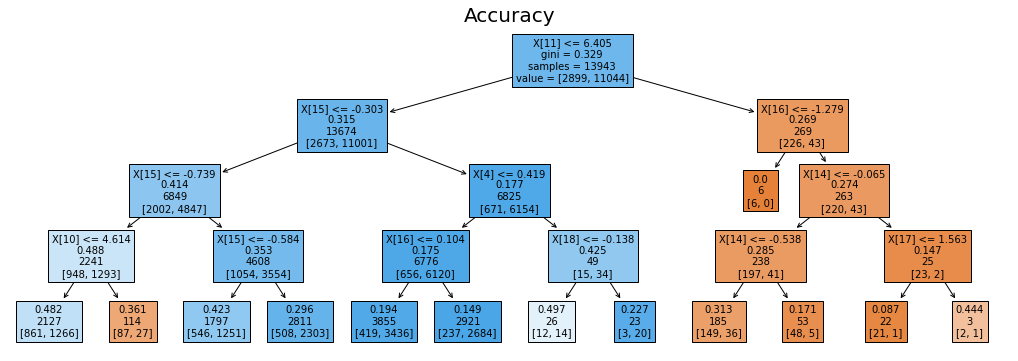

In [ ]:
# arbol generado por el modelo 'arbol_decision_ac' 
plt.figure(figsize=(18,6))
plot_tree(arbol_decision_ac, filled=True, max_depth= 4, fontsize=10, label='root')
plt.title('Accuracy', size=20)
plt.show()

In [ ]:

print('-----------------------------------')
print('Profundidad máxima según métrica:'
      '\n Accuracy : {}'
      .format(
          arbol_decision_ac.get_depth()
      ))
print('-----------------------------------')
print('Cantida de hojas según métrica:'
      '\n Accuracy : {}' 
      .format(
          arbol_decision_ac.get_n_leaves()
      ))
print('-----------------------------------')

-----------------------------------
Profundidad máxima según métrica:
 Accuracy : 4
-----------------------------------
Cantida de hojas según métrica:
 Accuracy : 13
-----------------------------------


**Matriz de confusión**

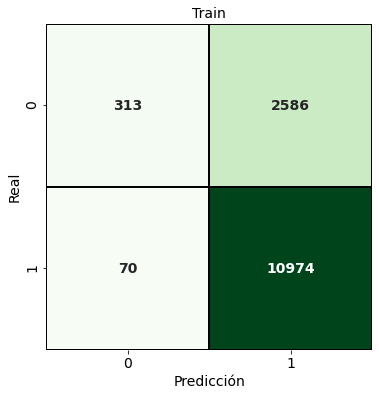

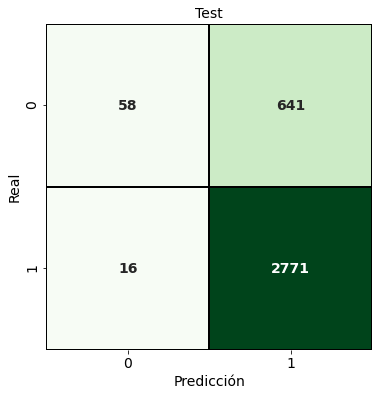

In [ ]:
# Train Matriz de confusion
plot_cm(ad_train, figsize=(10,6), title='Train', cmap='Greens');

# Test Matriz de confusion
plot_cm(ad_test, figsize=(10,6), title='Test', cmap='Greens');



**Curvas ROC y PR**

<module 'matplotlib.pyplot' from '/home/pgianni/venv/vector/lib/python3.7/site-packages/matplotlib/pyplot.py'>

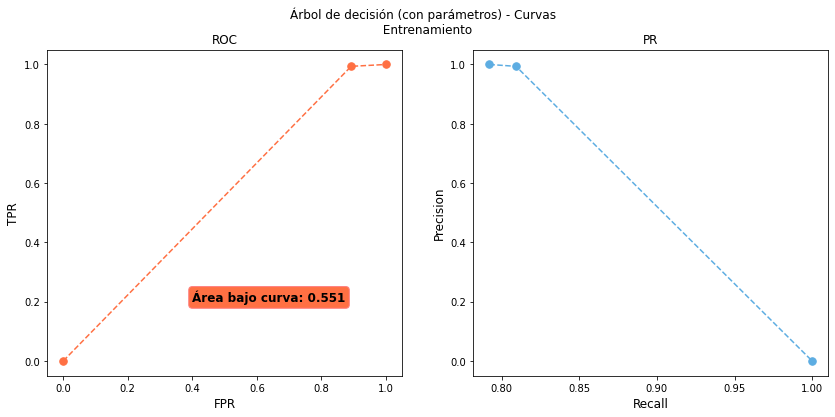

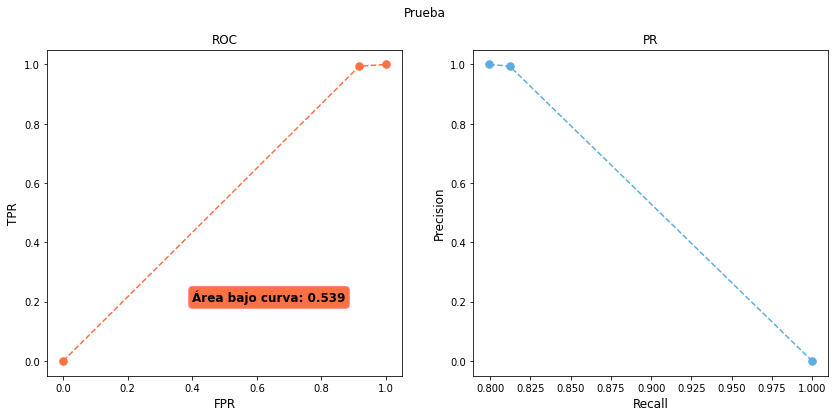

In [ ]:
plot_roc_pr(y_train, y_train_pred_arbol_ac, Title='Árbol de decisión (con parámetros) - Curvas \n Entrenamiento')
plot_roc_pr(y_test, y_test_pred_arbol_ac, Title='Prueba')